In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from sklearn.datasets import fetch_california_housing

# 보스턴 집값 데이터셋 불러오기
boston = fetch_california_housing()
print("Boston Housing Dataset:")
print(boston.data.shape)  # 데이터의 형태 확인
print(boston.feature_names)  # 입력 변수들의 이름 확인

Boston Housing Dataset:
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
boston.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
df = boston.data
target = boston.target

In [6]:
df

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
input = ss.fit_transform(df)

In [8]:
input.shape

(20640, 8)

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

In [10]:
train_input.shape

(16512, 8)

In [24]:
history_list = []

def test_activation(activation, title=None, learning_rate=1e-4, patience=3, epochs=100, return_list = False, no_limit=False):
    from graph import paint_graph
    model = keras.Sequential([
    layers.Dense(128, activation=activation),
    layers.Dropout(0.1),
    layers.Dense(64, activation=activation),
    layers.Dropout(0.1),
    layers.Dense(32, activation=activation),
    layers.Dense(1)
    ])
    
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_absolute_error', optimizer=adam)
    Early_stopping_cb = keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    if no_limit:
        history = model.fit(train_input, train_target, epochs=epochs,
                            validation_data=(test_input, test_target))
    else:
        history = model.fit(train_input, train_target, epochs=epochs, 
                        validation_data=(test_input, test_target),
                        callbacks=[Early_stopping_cb])
    paint_graph(history, title=title) # 해당 activation function의 loss-epochs 그래프를 그려주는 함수
    
    if return_list:
        return {title:history}

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4542 - val_loss: 0.8661
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8752 - val_loss: 0.8536
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8601 - val_loss: 0.8251
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8171 - val_loss: 0.7478
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7417 - val_loss: 0.6386
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6486 - val_loss: 0.5928
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6125 - val_loss: 0.5746
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5907 - val_loss: 0.5593
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5692 - val_loss: 0.5421
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5607 - val_loss: 0.5323
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5513 - val_loss: 0.5227
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

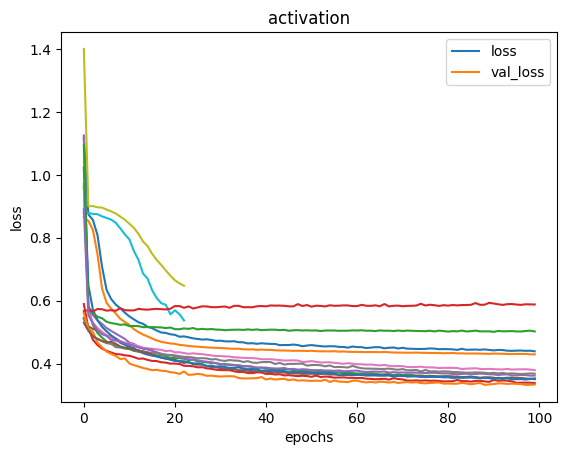

In [25]:
from activation_function_ import volcano_function, junsung_activation, y_x, MadeInChina
from varname import nameof

activation_list = ['sigmoid', 'relu', 'tanh', 'elu', volcano_function, junsung_activation, y_x, MadeInChina]
history_list = []

for activation in activation_list:
    if type(activation) == str:
        history_list.append(test_activation(activation, title=activation, return_list=True, no_limit=True))
    else:
        history_list.append(test_activation(activation, title=nameof(activation), return_list=True, no_limit=True))

In [22]:
history_list

[]

In [14]:
dic = {'1':'2'}
print(dic.keys())
print(type(dic.keys()))
name = list(dic.keys())
print(name)

dict_keys(['1'])
<class 'dict_keys'>
['1']


In [15]:
from graph import paint_graph

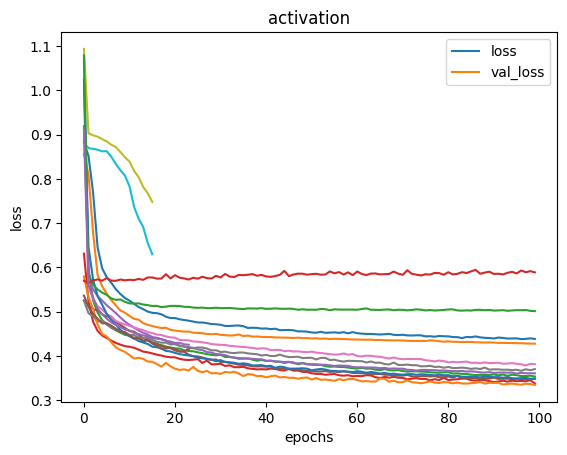

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1)

i = 0
for history in history_list:
    name = list(history.keys())[0]
    i += 1
    if i == len(history_list):
        paint_graph(history[name], title=name, ax=axs, show_graph=True)
    else:
        paint_graph(history[name], title=name, ax=axs)